<a href="https://colab.research.google.com/github/gabrielalastra/TwitterAPI_COVID_2022/blob/main/data_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import json


<h3 align='right'>Cleaning the Data and Saving as CSV</h3> 
<hr color='cian'>

<h5 align='right'>English</h5>

In [14]:
archiveEN = pd.read_json('/content/drive/MyDrive/diciEN_COVID_jan2022.json',
                         orient='schema')
archiveEN.head()

,created_at,text,user,source,favorite_count,retweet_count
0,2022-01-27 10:49:20+00:00,Today restrictions are taken away and it’s rea...,"{'id': 1423410674038890502, 'id_str': '1423410...","<a href=""http://twitter.com/download/iphone"" r...",0,0
1,2022-01-27 10:49:19+00:00,Denmark to lift Covid curbs in return to 'life...,"{'id': 19310250, 'id_str': '19310250', 'name':...","<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0
2,2022-01-27 10:49:18+00:00,Letter from the Antipodes: AC40 first look.. S...,"{'id': 58906640, 'id_str': '58906640', 'name':...","<a href=""https://www.sail-world.com/"" rel=""nof...",0,0
3,2022-01-27 10:49:18+00:00,@fortyfive09ro Covid + 🙌,"{'id': 1361595853492822020, 'id_str': '1361595...","<a href=""http://twitter.com/download/android"" ...",0,0
4,2022-01-27 10:49:17+00:00,@Craig_A_Spencer Why won‘t more doctors do ear...,"{'id': 1206180536, 'id_str': '1206180536', 'na...","<a href=""http://twitter.com/download/iphone"" r...",0,0


In [15]:
archiveEN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      300 non-null    datetime64[ns, UTC]
 1   text            300 non-null    object             
 2   user            300 non-null    object             
 3   source          300 non-null    object             
 4   favorite_count  300 non-null    int64              
 5   retweet_count   300 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 14.2+ KB


In [24]:
#converting datetime
archiveEN['created_at']=pd.to_datetime(archiveEN['created_at'],
                                   infer_datetime_format=True)

#columns of User section
user = archiveEN['user'].apply(pd.Series)
user2 = user['location']
user3 = user['verified']
user4 = user['screen_name']
archiveEN = pd.concat([archiveEN, user2, user3, user4], axis=1)

In [25]:
archiveEN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      300 non-null    datetime64[ns, UTC]
 1   text            300 non-null    object             
 2   user            300 non-null    object             
 3   source          300 non-null    object             
 4   favorite_count  300 non-null    int64              
 5   retweet_count   300 non-null    int64              
 6   location        300 non-null    object             
 7   verified        300 non-null    bool               
 8   screen_name     300 non-null    object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 19.2+ KB


In [20]:
#there is a missign value?
print(archiveEN.isnull().value_counts())
print('\n')
print(archiveEN.isna().value_counts())

created_at  text   user   source  favorite_count  retweet_count
False       False  False  False   False           False            300
dtype: int64


created_at  text   user   source  favorite_count  retweet_count
False       False  False  False   False           False            300
dtype: int64


In [28]:
archiveEN['source'].value_counts()

<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    97
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 91
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      76
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>       11
<a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a>                                 4
<a href="http://publicize.wp.com/" rel="nofollow">WordPress.com</a>                      3
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      2
<a href="https://buffer.com" rel="nofollow">Buffer</a>                                   2
<a href="http://www.powerapps.com" rel="nofollow">Microsoft Power Platform</a>           1
<a href="https://app.agorapulse.com" rel="nofollow">Agorapulse app</a>                   1
<a href="http://www.suttersmillcapital.com" rel="nofollow">smcapplication</a>            1

In [36]:
archiveEN['source'] = archiveEN['source'].astype('string')

In [32]:
#Important to specify 
archiveEN['source'] = archiveEN['source'].replace({
    '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>' : 'Android',
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'iPhone',
    '<a href="http://twittbot.net/" rel="nofollow">twittbot.net</a>' : 'Twittbot',
    '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>' : 'Tw Web AP',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck',
    '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>' : 'iPad',
    '<a href="https://twitter.com/RATStockAU" rel="nofollow">covidalertau</a>' : 'COVID alerta AU'
})

In [37]:
#Generalize 
archiveEN['source'] = archiveEN['source'].replace({
    '<a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a>' : 'website',
    '<a href="http://publicize.wp.com/" rel="nofollow">WordPress.com</a>' : 'website',
    '<a href="https://buffer.com" rel="nofollow">Buffer</a>' : 'website',
    '<a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a>' : 'website',
    '<a href="http://publicize.wp.com/" rel="nofollow">WordPress.com</a>' : 'website',
    '<a href="https://buffer.com" rel="nofollow">Buffer</a>' : 'website',
    '<a href="https://www.sail-world.com/" rel="nofollow">SWautotweet</a>' : 'website',
    '<a href="https://curlytales.com" rel="nofollow">CT_Tweet</a>' : 'website',
    '<a href="https://www.echobox.com" rel="nofollow">Echobox</a>' : 'website',
    '<a href="http://crowdcontrolhq.com/" rel="nofollow">CrowdControlHQ</a>' : 'website',
    '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>' : 'website',
    '<a href="http://postify.ru" rel="nofollow">Postify1</a>' : 'website',
    '<a href="https://www.givepulse.com" rel="nofollow">GivePulseEvents</a>' : 'website',
    '<a href="http://www.suttersmillcapital.com" rel="nofollow">smcapplication</a>' : 'website',
    '<a href="http://www.powerapps.com" rel="nofollow">Microsoft Power Platform</a>' : 'website',
    '<a href="https://app.agorapulse.com" rel="nofollow">Agorapulse app</a>' : 'website',
    '<a href="https://marketscafe.com" rel="nofollow">MarketsCafe</a>' : 'website',
    '<a href="https://www.diolch.wales" rel="nofollow">www.diolch.wales</a>' : 'website',
    '<a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for iΟS</a>' : 'website'
})

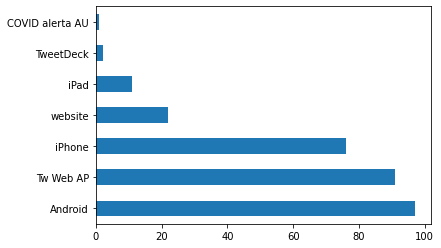

In [96]:
archiveEN['source'].value_counts().plot(kind='barh')

In [39]:
archiveEN['verified'] = archiveEN['verified'].astype('string')

In [42]:
archiveEN['verified'] = archiveEN['verified'].replace({
    'True' : 'Yes',
    'False' : 'No'
})

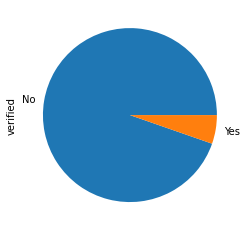

In [95]:
archiveEN['verified'].value_counts().plot(kind='pie')

In [122]:
archiveEN.to_csv('/content/drive/MyDrive/Colab Notebooks/archiveEN_clean_jan2022.csv')

<hr color='blue'>
<h5 align='right'>Deutsch</h5>

In [85]:
archiveDE = pd.read_json('/content/drive/MyDrive/diciDE_COVID_jan2022.json', orient='schema')
archiveDE

,created_at,text,user,source,favorite_count,retweet_count
0,2022-01-27 11:00:45+00:00,BTW: Joe Rogan ist übrigens nicht nur wegen CO...,"{'id': 83573370, 'id_str': '83573370', 'name':...","<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0
1,2022-01-27 11:00:35+00:00,Welttag der Bildung: Covid-19-Pandemie verschä...,"{'id': 52403524, 'id_str': '52403524', 'name':...","<a href=""http://www.jugendhilfeportal.de"" rel=...",0,0
2,2022-01-27 11:00:27+00:00,"Experten, darunter \nRobert Garry &amp; Mike F...","{'id': 1438185116136878083, 'id_str': '1438185...","<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0
3,2022-01-27 11:00:17+00:00,@u1829387190039 @SWagenknecht verpflichtend we...,"{'id': 1338961332125757440, 'id_str': '1338961...","<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0
4,2022-01-27 11:00:16+00:00,@DBOnTweets @Ricarda_Lang Mit falschen Zahlen ...,"{'id': 92365834, 'id_str': '92365834', 'name':...","<a href=""http://twitter.com/download/iphone"" r...",0,0
...,...,...,...,...,...,...
295,2022-01-27 10:11:19+00:00,"Es ist erstaunlich, dass nach 2 Jahren #Corona...","{'id': 2214821131, 'id_str': '2214821131', 'na...","<a href=""http://twitter.com/download/iphone"" r...",3,0
296,2022-01-27 10:11:15+00:00,@RonaiChaker Die Erkrankung kann das aber. Ich...,"{'id': 4481375357, 'id_str': '4481375357', 'na...","<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0
297,2022-01-27 10:11:04+00:00,"@SWagenknecht Danke, Frau Wagenknecht.\n\nhttp...","{'id': 1390548591501004801, 'id_str': '1390548...","<a href=""http://twitter.com/download/iphone"" r...",0,0
298,2022-01-27 10:11:00+00:00,@draqonlt @Tim50023602 @n1trokbm @MontanaBlack...,"{'id': 2764814483, 'id_str': '2764814483', 'na...","<a href=""http://twitter.com/download/iphone"" r...",0,0


In [86]:
archiveDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      300 non-null    datetime64[ns, UTC]
 1   text            300 non-null    object             
 2   user            300 non-null    object             
 3   source          300 non-null    object             
 4   favorite_count  300 non-null    int64              
 5   retweet_count   300 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 14.2+ KB


In [87]:
#converting datetime
archiveDE['created_at']=pd.to_datetime(archiveDE['created_at'],
                                   infer_datetime_format=True)

#columns of User section
user = archiveDE['user'].apply(pd.Series)
user2 = user['location']
user3 = user['verified']
user4 = user['screen_name']
archiveDE = pd.concat([archiveDE, user2, user3, user4], axis=1)

In [88]:
archiveDE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      300 non-null    datetime64[ns, UTC]
 1   text            300 non-null    object             
 2   user            300 non-null    object             
 3   source          300 non-null    object             
 4   favorite_count  300 non-null    int64              
 5   retweet_count   300 non-null    int64              
 6   location        300 non-null    object             
 7   verified        300 non-null    bool               
 8   screen_name     300 non-null    object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 19.2+ KB


In [72]:
archiveDE.isnull().value_counts()

created_at  text   user   source  favorite_count  retweet_count  location  verified  screen_name
False       False  False  False   False           False          False     False     False          300
dtype: int64

In [73]:
archiveDE.isna().value_counts()

created_at  text   user   source  favorite_count  retweet_count  location  verified  screen_name
False       False  False  False   False           False          False     False     False          300
dtype: int64

In [90]:
archiveDE['verified'] = archiveDE['verified'].astype('string')

In [91]:
archiveDE['verified'] = archiveDE['verified'].replace({
    'True' : 'Yes',
    'False' : 'No'
})


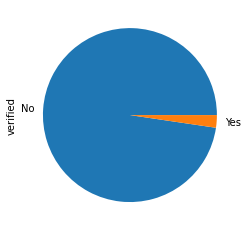

In [94]:
archiveDE['verified'].value_counts().plot(kind='pie')

In [98]:
archiveDE['source'] = archiveDE['source'].astype('string')

In [109]:
#Important to specify 
archiveDE['source'] = archiveDE['source'].replace({
    '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>' : 'Android',
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'iPhone',
    '<a href="http://twittbot.net/" rel="nofollow">twittbot.net</a>' : 'Twittbot',
    '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>' : 'Tw Web AP',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck',
    '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>' : 'iPad',
    '<a href="http://itunes.apple.com/us/app/twitter/id409789998?mt=12" rel="nofollow">Twitter for Mac</a>' : 'iTunes'
})

In [105]:
#Generalize
archiveDE['source'] = archiveDE['source'].replace({
    '<a href="http://publicize.wp.com/" rel="nofollow">WordPress.com</a>' : 'website',
    '<a href="http://lokalo.de" rel="nofollow">http://lokalo.de</a>' : 'website',
    '<a href="http://www.chronicle.lu" rel="nofollow">Chronicle.lu v2</a>' : 'website',
    '<a href="http://www.chronicle.lu" rel="nofollow">Chronicle.lu v2 corporate</a>' : 'website',
    '<a href="http://thailandtip.info/" rel="nofollow">WP to Zwitscher2</a>' : 'website',
    '<a href="http://www.hubspot.com/" rel="nofollow">HubSpot</a>' : 'website',
    '<a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a>' : 'website',
    '<a href="https://www.echobox.com" rel="nofollow">Echobox</a>' : 'website',
    '<a href="http://www.jugendhilfeportal.de" rel="nofollow">Jugendhilfeportal</a>' : 'website',
    '<a href="https://app.cleverpush.com" rel="nofollow">CleverPush</a>' : 'website',
    '<a href="http://www.diesachsen.de" rel="nofollow">DieSachsen</a>' : 'website',
    '<a href="https://dashboard.heropost.io/" rel="nofollow">Heropost</a>'  : 'website',
    '<a href="https://www.blog2social.com" rel="nofollow">Blog2Social APP</a>' : 'website',
    '<a href="https://zapier.com/" rel="nofollow">Zapier.com</a>' : 'website',
    '<a href="https://sproutsocial.com" rel="nofollow">Sprout Social</a>' : 'website'

})

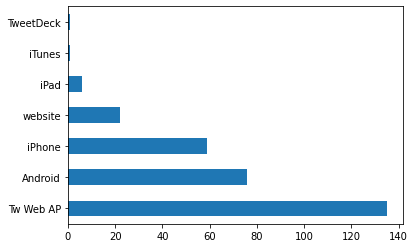

In [111]:
archiveDE['source'].value_counts().plot(kind='barh')

In [123]:
archiveDE.to_csv('/content/drive/MyDrive/Colab Notebooks/archiveDE_clean_jan2022.csv')